This script aims at explore the flight radar data taken from OpenSkyNetwork Live API

In [1]:
ls

In [2]:
import pandas as pd
#pd.DataFrame?

In [3]:
df = pd.read_csv("flights_over_cergy.csv")
print("Total data:", len(df))

Total data: 355


In [4]:
print("Duplicates:", len(df[df.duplicated(subset=['callsign'])]))
df[df.duplicated(subset=['callsign'])]

Duplicates: 176


,timestamp,icao24,callsign,origin_country,time_position,last_contact,longitude,latitude,baro_altitude,on_ground,velocity,heading,vertical_rate,sensors,geo_altitude,squawk,spi,position_source
2,1613392075,4b0f8f,HBFXF,Switzerland,1613392075,1613392075,2.0273,49.0233,8229.60,False,156.74,144.48,0.00,NaN,8382.00,503.0,False,0
6,1613396490,394a06,AFR006,France,1613396489,1613396489,2.0040,49.0456,3550.92,False,164.61,274.48,6.50,NaN,3688.08,NaN,False,0
8,1613397779,39c423,AFR688,France,1613397779,1613397779,2.0288,49.0375,3307.08,False,146.62,269.40,4.55,NaN,3436.62,NaN,False,0
11,1613399624,48597d,TRA76X,Kingdom of the Netherlands,1613399624,1613399624,2.0824,49.0539,12192.00,False,225.95,27.38,0.00,NaN,12214.86,1000.0,False,0
20,1613478385,406eec,VCG1XP,United Kingdom,1613478384,1613478384,2.0620,49.0184,12496.80,False,199.53,154.82,0.00,NaN,12420.60,502.0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,1614418795,394a06,AFR5397,France,1614418794,1614418794,2.0077,49.0427,1615.44,False,129.98,137.41,-2.93,NaN,1844.04,6315.0,False,0
344,1614437549,ac4d43,FDX5030,United States,1614437548,1614437549,2.0145,49.0414,1341.12,False,133.61,222.66,0.00,NaN,1546.86,4117.0,False,0
349,1614486294,060041,MAU14,Mauritius,1614486294,1614486294,2.0144,49.0469,1600.20,False,129.76,206.87,-5.85,NaN,1775.46,1000.0,False,0
350,1614495040,8990dc,EVA087,Taiwan,1614495039,1614495040,2.0124,49.0474,1478.28,False,123.78,194.44,-2.28,NaN,1661.16,3510.0,False,0


In [5]:
del df["sensors"]
del df["squawk"]
del df["icao24"]
del df["time_position"]
del df["last_contact"]
del df["longitude"]
del df["latitude"]
del df["on_ground"]
del df["spi"]
del df["position_source"]
df = df.drop_duplicates(subset=['callsign'])

In [6]:
# Remove airplane passing over Cergy higher than 5000 feet
df = df.drop(df[df.geo_altitude > 5000].index)
df

,timestamp,callsign,origin_country,baro_altitude,velocity,heading,vertical_rate,geo_altitude
5,1613396464,AFR006,France,3390.90,149.66,274.53,6.83,3528.06
7,1613397755,AFR688,France,3200.40,134.27,270.00,4.55,3329.94
9,1613397875,ACA871,Canada,3870.96,173.92,274.58,11.70,4008.12
17,1613464335,CTM0032,France,2819.40,116.99,30.96,12.03,2910.84
18,1613470739,VLJ359H,France,830.58,94.32,329.52,-2.93,891.54
...,...,...,...,...,...,...,...,...
342,1614399645,AFR567,France,1318.26,128.78,182.98,0.00,1531.62
347,1614443119,AFR6723,France,1333.50,127.67,130.75,0.00,1539.24
348,1614445314,AFR6735,France,1341.12,127.18,131.56,-0.65,1546.86
351,1614520250,FGPJA,France,304.80,88.18,191.44,0.98,449.58


In [7]:
df.timestamp = pd.to_datetime(df.timestamp, unit='s').dt.normalize()
df["day"] = df.timestamp.dt.day
df["month"] = df.timestamp.dt.month
df["year"] = df.timestamp.dt.year
df

,timestamp,callsign,origin_country,baro_altitude,velocity,heading,vertical_rate,geo_altitude,day,month,year
5,2021-02-15,AFR006,France,3390.90,149.66,274.53,6.83,3528.06,15,2,2021
7,2021-02-15,AFR688,France,3200.40,134.27,270.00,4.55,3329.94,15,2,2021
9,2021-02-15,ACA871,Canada,3870.96,173.92,274.58,11.70,4008.12,15,2,2021
17,2021-02-16,CTM0032,France,2819.40,116.99,30.96,12.03,2910.84,16,2,2021
18,2021-02-16,VLJ359H,France,830.58,94.32,329.52,-2.93,891.54,16,2,2021
...,...,...,...,...,...,...,...,...,...,...,...
342,2021-02-27,AFR567,France,1318.26,128.78,182.98,0.00,1531.62,27,2,2021
347,2021-02-27,AFR6723,France,1333.50,127.67,130.75,0.00,1539.24,27,2,2021
348,2021-02-27,AFR6735,France,1341.12,127.18,131.56,-0.65,1546.86,27,2,2021
351,2021-02-28,FGPJA,France,304.80,88.18,191.44,0.98,449.58,28,2,2021


In [8]:
df3 = df[["day"]].assign(numberplane=0)
df4 = df3.groupby(by=["day"]).count()
df4

,numberplane
day,
15,3
16,2
17,17
18,32
19,34
20,27
21,5
22,2
23,1


Let's plot the number of airplane passing over Cergy every day

<AxesSubplot:xlabel='day'>

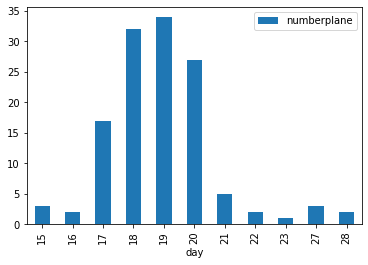

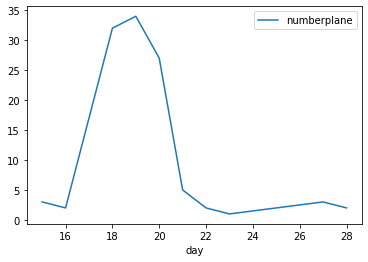

In [13]:
df4.plot.bar(y="numberplane", use_index=True)
df4.plot.line(y="numberplane", use_index=True)

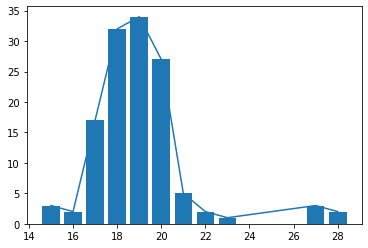

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.gca()

ax.bar(df4.index, df4.numberplane)
ax.plot(df4.index, df4.numberplane)

In [12]:
df4["numberplane"].tail(1).values[0]

2